<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/Trees_final_task_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решающие деревья. Практика

В этом задании будем решать задачу классификации клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора (оттоковый клиент) в ближайшее время или нет.

В ноутбуке будем использовать несколько моделей, в том числе SVM, поэтому установим библиотеку для быстрого обучения SVM.

## Импорт библиотек и загрузка данных

In [8]:
# убедимся, что версия python < 3.10
# !python --version

Python 3.10.12


In [9]:
# %%capture
# !python -m pip install --upgrade pip
# !pip install --upgrade scikit-learn-intelex

In [10]:
# from sklearnex import patch_sklearn
# patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [1]:
import sys
import os
import site
import pandas as pd
import numpy as np

sys.path.append(os.path.join(os.path.dirname(site.getsitepackages()[0]), "site-packages"))

In [2]:
# зафиксируем константы
RANDOM_STATE = 42

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Практика

In [4]:
np.random.seed(RANDOM_STATE)

Сделайте первичную обработку данных:

1) Выбросите колонку State

2) Колонки International plan и Voice mail plan закодируйте следующим образом: "Yes" замените на 1, а "No" на 0.

3) Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [5]:
# your code here
df.drop(columns=['State'], axis=1, inplace=True)
df['International plan'] = df['International plan'].map({'Yes':1, 'No':0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes':1, 'No':0})
df['Churn']=df['Churn'].astype(np.int8)

### Вопрос

Чему равна сумма значений в закодированном столбце International plan?

**Ответ:** 323

In [6]:
# your code here
df['International plan'].sum()

np.int64(323)

Выведите на экран первые строки измененной таблицы, чтобы проверить, что все преобразования сработали.

In [7]:
# your code here
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [8]:
# your code here
X = df.drop(columns=['Churn'], axis=1)
y = df['Churn']

### Вопрос

Проверьте баланс классов. Является ли выборка сбалансированной?

**Ответ:** Нет, присутствует значительный дисбаланс классов, влияющий и на обучение, и на оценку качества моделей

In [9]:
# your code here
y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

По кросс-валидации с тремя фолдами и метрикой ROC-AUC (scoring='roc_auc') обучите:

1) Логистическую регрессию

2) Метод опорных векторов (с kernel='linear')

Выведите на экран среднее качество моделей на кросс-валидации.

При объявлении SVC не забудьте указать в гиперпараметрах probability = True (так как метод изначально не предсказывает вероятности классов, а они нам нужны для вычисления ROC-AUC).

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


In [ ]:

# your code here
clf = LogisticRegression()
svc1 = SVC(kernel='linear', probability=True)

cv_clf = cross_val_score(clf, X, y, cv=3, scoring='roc_auc').mean()
cv_svc1 = cross_val_score(svc1, X, y, cv=3, scoring='roc_auc').mean()

print(f"Logistic Regression: {cv_clf}")
print(f"SVC: {cv_svc1}")

# Logistic Regression: 0.7322523700555736
# SVC: 0.8043543641712979

# Logistic Regression: 0.7300991609458428
# SVC: 0.7558308815517053

Теперь обучите решающее дерево с параметрами по умолчанию по кросс-валидации с тремя фолдами и той же метрикой.

ВАЖНО! У решающего дерева для воспроизводимости результатов фиксируйте random_state = RANDOM_STATE

In [12]:
from sklearn.tree import DecisionTreeClassifier

# your code here
tree1 = DecisionTreeClassifier(random_state=RANDOM_STATE)
cv_tree1 = cross_val_score(tree1, X, y, cv=3, scoring='roc_auc', verbose=2).mean()
print(f"DecisionTree: {cv_tree1}")

# DecisionTree: 0.8361261850277869

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
DecisionTree: 0.8361261850277869


### Вопрос

Какой из трех алгоритмов показал наилучшее качество на кросс-валидации?

**Ответ:** DecisionTree: 0.8361261850277869

Ваша цель - максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом).

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion - "gini" или "entropy".

Для подбора параметров используйте GridSearchCV с тремя фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

При подборе гиперпараметров по кросс-валидации для дальнейшей корректной оценки качества модели нужна отдельная выборка. Давайте сразу действовать правильно:

1) сначала разбиваем (как и раньше) данные на тренировочную и тестовую части
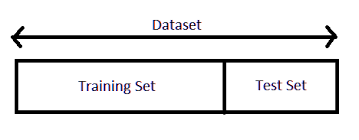

2) затем по тренировочной части при помощи GridSearchCV подбираем оптимальные значения гиперпараметров

3) наконец, делаем предсказание модели с оптимальными гиперпараметрами на тестовых данных и уже по ним оцениваем итоговую метрику.

Сложно, зато правильно!

Первую модель обучим для примера. Дальше вы сами.

In [13]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [14]:
from sklearn.model_selection import GridSearchCV

params = {'C' : np.linspace(0.1, 10.01, 20)}

gs = GridSearchCV(LogisticRegression(), params, cv=3, scoring='roc_auc', verbose=1)

gs.fit(Xtrain, ytrain)

gs.best_score_, gs.best_estimator_
# (0.7077953439949164, LogisticRegression(C=5.837368421052631))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/yukonoff/code/hse_ai_24/hse-ai24-ml/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yukonoff/code/hse_ai_24/hse-ai24-ml/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

(np.float64(0.7135511972702843),
 LogisticRegression(C=np.float64(1.6647368421052633)))

In [15]:
from sklearn.metrics import roc_auc_score

lr = gs.best_estimator_

pred_lr = lr.predict_proba(Xtest)[:,1]
print(roc_auc_score(ytest, pred_lr))

# 0.7810788977650119

0.7810788977650119


In [16]:
# your code here
params_SVC = {
    'C' : np.linspace(0.1, 10.01, 20),
    # 'C' : [0.1],
}

import warnings
# suppress warnings
warnings.filterwarnings('ignore')


In [17]:

gs_svc = GridSearchCV(SVC(kernel='linear', probability=True), params_SVC, cv=3, scoring='roc_auc', verbose=2)
gs_svc.fit(Xtrain, ytrain)
print(f"Train best score = {gs_svc.best_score_}, best estimator = {gs_svc.best_estimator_}")
svc2 = gs_svc.best_estimator_
pred_svc2 = svc2.predict_proba(Xtest)[:,1]
print(roc_auc_score(ytest, pred_svc2))

# Train best score = 0.7976368712590731, best estimator = SVC(C=np.float64(4.272631578947368), kernel='linear', probability=True)
# 0.8135021338055176

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..............................................C=0.1; total time=  18.4s
[CV] END ..............................................C=0.1; total time=  11.8s
[CV] END ..............................................C=0.1; total time=  15.6s
[CV] END ................................C=0.621578947368421; total time=  35.4s
[CV] END ................................C=0.621578947368421; total time=  27.5s
[CV] END ................................C=0.621578947368421; total time=  27.7s
[CV] END ...............................C=1.1431578947368422; total time=  46.3s
[CV] END ...............................C=1.1431578947368422; total time=  32.7s
[CV] END ...............................C=1.1431578947368422; total time=  41.3s
[CV] END ...............................C=1.6647368421052633; total time=  48.6s
[CV] END ...............................C=1.6647368421052633; total time=  42.1s
[CV] END ...............................C=1.6647

In [20]:
params_tree = {
    "max_depth": np.arange(1, 10, 1),
    'criterion': ['gini', 'entropy'],
}

gs_tree = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_STATE), params_tree, cv=3, scoring='roc_auc', verbose=2)
gs_tree.fit(Xtrain, ytrain)
print(f"Train best score = {gs_tree.best_score_}, best estimator = {gs_tree.best_estimator_}")
tree2 = gs_tree.best_estimator_
pred_tree2 = tree2.predict_proba(Xtest)[:,1]
roc_auc_tree2 = roc_auc_score(ytest, pred_tree2)
print(f'DecisionTree ROC-AUC (test) = {roc_auc_tree2}')

# Train best score = 0.8644263148363854, best estimator = DecisionTreeClassifier(max_depth=np.int64(6), random_state=42)
# DecisionTree ROC-AUC (test) = 0.8555540142471298

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.0s
[CV] END ........................criterion=gini,

### Вопрос

Чему равно качество решающего дерева с подобранными гиперпараметрами, посчитанное на тестовой выборке?

Ответ округлите до сотых.

**Ответ:** 0.86

Какая модель справилась с решением задачи лучше всего по метрике roc_auc?

**Ответ:** ДЕРЕВО

Нарисуйте roc-кривую для наилучшей модели.

In [26]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# your code here


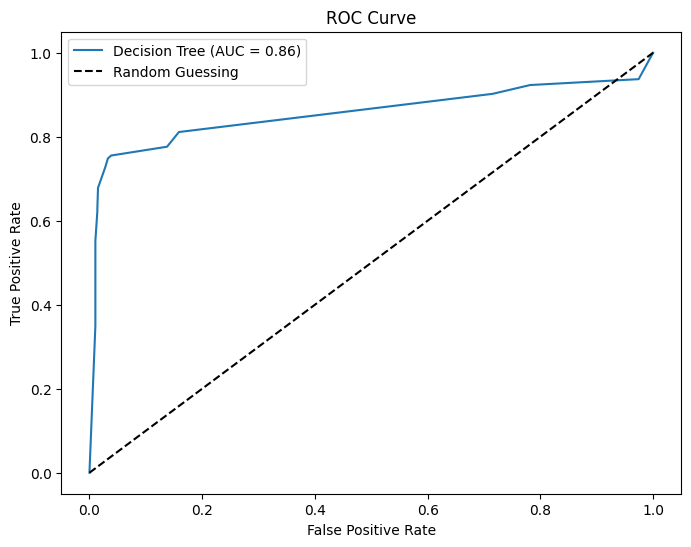

In [27]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# Получение значений FPR, TPR и порогов для ROC-кривой
fpr, tpr, thresholds = roc_curve(ytest, pred_tree2)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_tree2:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


Сравните между собой две лучшие модели.

### Вопрос

Насколько сильно отличается качество предсказания на тестовых данных?
(вычислите разность значений roc-auc)

In [25]:
# Мои результаты: 
print(f'SVC ROC-AUC (test) = {roc_auc_score(ytest, pred_svc2)}, DecisionTree ROC-AUC (test) = {roc_auc_tree2}')
print(f'Разница: {roc_auc_tree2 - roc_auc_score(ytest, pred_svc2):.2f}')

# SVC ROC-AUC (test) = 0.8135021338055176, DecisionTree ROC-AUC (test) = 0.8555540142471298
# Разница: 0.04

# При этом правильный ответ в Stepik 10.4 - 0.08. Непонятно почему

SVC ROC-AUC (test) = 0.8135021338055176, DecisionTree ROC-AUC (test) = 0.8555540142471298
Разница: 0.04


Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трех самых важных признаков. Совпадают ли они?

### Вопрос

Какой признак наиболее важен для решающего дерева?

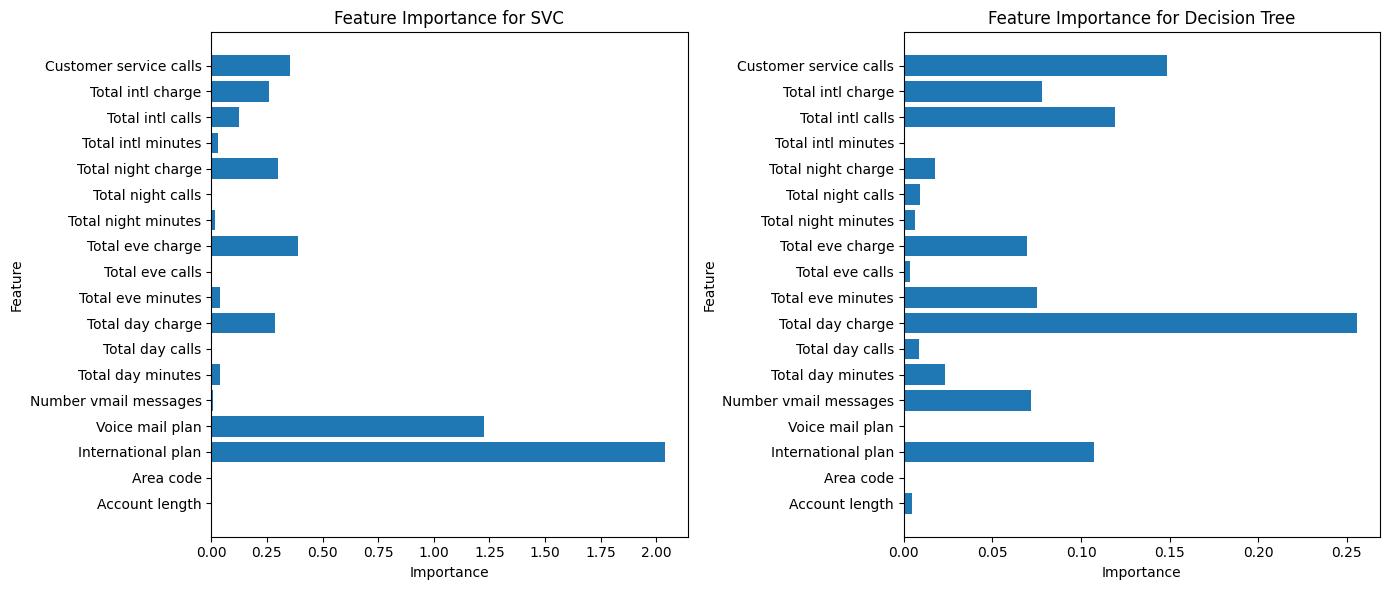

Top 3 features for SVC (...->top): Index(['Total eve charge', 'Voice mail plan', 'International plan'], dtype='object')
Top 3 features for Decision Tree (...->top): Index(['Total intl calls', 'Customer service calls', 'Total day charge'], dtype='object')


In [30]:
# Получение важности признаков для SVC
svc_feature_importance = np.abs(svc2.coef_[0])

# Получение важности признаков для решающего дерева
tree_feature_importance = tree2.feature_importances_

# Построение гистограмм
features = X.columns

plt.figure(figsize=(14, 6))

# Гистограмма для SVC
plt.subplot(1, 2, 1)
plt.barh(features, svc_feature_importance)
plt.title('Feature Importance for SVC')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Гистограмма для Decision Tree
plt.subplot(1, 2, 2)
plt.barh(features, tree_feature_importance)
plt.title('Feature Importance for Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

# Сравнение трех самых важных признаков
svc_top3_features = features[np.argsort(svc_feature_importance)[-3:]]
tree_top3_features = features[np.argsort(tree_feature_importance)[-3:]]

print(f"Top 3 features for SVC (...->top): {svc_top3_features}")
print(f"Top 3 features for Decision Tree (...->top): {tree_top3_features}")

Сделайте выводы (для себя)

1) Являются ли данные сбалансированными? Что это означает?

2) Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3) Одинаковые ли признаки важны для работы двух наилучших моделей? Как вы думаете, почему так?

**Выводы:**

1. Данные, очевидно, несбалансированы. Соотношение классов целевой переменной Churn = 2850:483
2. После подбора параметров лучше решает Дерево
3. Для разных моделей важны разные признаки, что интересно. Вероятно это потому, что модели разные по природе, по способу обучения.